In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_csv("train.csv")
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [9]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [10]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [11]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

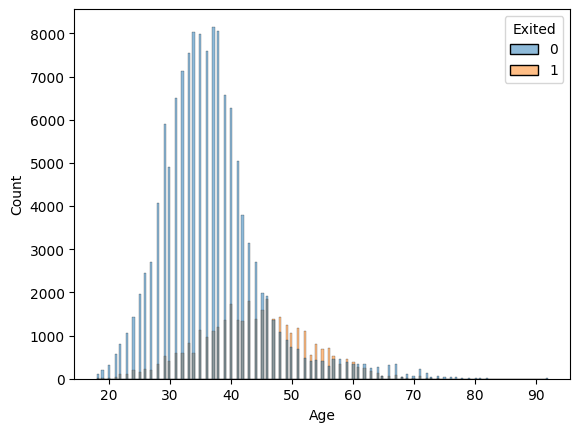

In [12]:
sns.histplot(data=df, x='Age', hue='Exited')

In [13]:
def WoE(data, feature_name, target_name):
    df = data.copy()
    woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: 'Exited', 0:'Not Exited'})
    woe_table['Pt Exited'] = woe_table['Exited'] / woe_table['Exited'].sum()
    woe_table['Pt Not Exited'] = woe_table['Not Exited'] / woe_table['Not Exited'].sum()
    woe_table['WoE'] = np.log(woe_table['Exited'] / woe_table['Not Exited'])
    # woe_table['Rank'] = woe_table['WoE'].rank()
    
    return woe_table


In [14]:
WoE(data=df, feature_name='HasCrCard', target_name='Exited')

Exited,Not Exited,Exited,Pt Exited,Pt Not Exited,WoE
HasCrCard,,,,,
0.0,31371,9235,0.264454,0.241106,-1.222883
1.0,98742,25686,0.735546,0.758894,-1.346564


In [15]:
woe_table_g = WoE(df, 'Gender', 'Exited')
woe_table_g

Exited,Not Exited,Exited,Pt Exited,Pt Not Exited,WoE
Gender,,,,,
Female,51779,20105,0.575728,0.397954,-0.946016
Male,78334,14816,0.424272,0.602046,-1.665274


In [16]:
woe_table_m = WoE(df, 'IsActiveMember', 'Exited')
woe_table_m

Exited,Not Exited,Exited,Pt Exited,Pt Not Exited,WoE
IsActiveMember,,,,,
0.0,58261,24624,0.705134,0.447772,-0.861211
1.0,71852,10297,0.294866,0.552228,-1.942756


In [18]:
df['Age'].min()

np.float64(18.0)

In [19]:
le = LabelEncoder()
df['Age_Cat'] = pd.cut(df['Age'], bins=[17.999, 33, 35, 37, 39, 41, 44, 92])
df_test['Age_Cat'] =  pd.cut(df_test['Age'], bins=[17.999, 33, 35, 37, 39, 41, 44, 92])
df['Age_Cat_Encoded'] = le.fit_transform(df['Age_Cat'].astype(str))
df_test['Age_Cat_Encoded'] = le.fit_transform(df_test['Age_Cat'].astype(str))
df['Geography'] = le.fit_transform(df['Geography'].astype(str))
df_test['Geography'] = le.fit_transform(df_test['Geography'].astype(str))
df['Gender'] = le.fit_transform(df['Gender'].astype(str))
df_test['Gender'] = le.fit_transform(df_test['Gender'].astype(str))

df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Cat,Age_Cat_Encoded
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,"(17.999, 33.0]",0
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,"(17.999, 33.0]",0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,"(39.0, 41.0]",4
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,"(33.0, 35.0]",1
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,"(17.999, 33.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,"(17.999, 33.0]",0
165030,165030,15665521,Okechukwu,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,"(33.0, 35.0]",1
165031,165031,15664752,Hsia,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,"(17.999, 33.0]",0
165032,165032,15689614,Hsiung,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,"(17.999, 33.0]",0


In [20]:
df['Salary_Cat'] = pd.cut(df['EstimatedSalary'], bins=[11.579, 64716, 83023, 98820, 132468, 162923, 199992.48])
df['Salary_encode'] = le.fit_transform(df['Salary_Cat'].astype(str))
df_test['Salary_Cat'] = pd.cut(df_test['EstimatedSalary'], bins=[11.579, 64716, 83023, 98820, 132468, 162923, 199992.48])
df_test['Salary_encode'] = le.fit_transform(df_test['Salary_Cat'].astype(str))
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Cat,Age_Cat_Encoded,Salary_Cat,Salary_encode
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,"(17.999, 33.0]",0,"(162923.0, 199992.48]",2
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,"(17.999, 33.0]",0,"(11.579, 64716.0]",0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,"(39.0, 41.0]",4,"(162923.0, 199992.48]",2
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,"(33.0, 35.0]",1,"(83023.0, 98820.0]",4
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,"(17.999, 33.0]",0,"(11.579, 64716.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,"(17.999, 33.0]",0,"(98820.0, 132468.0]",5
165030,165030,15665521,Okechukwu,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,"(33.0, 35.0]",1,"(98820.0, 132468.0]",5
165031,165031,15664752,Hsia,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,"(17.999, 33.0]",0,"(98820.0, 132468.0]",5
165032,165032,15689614,Hsiung,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,"(17.999, 33.0]",0,"(64716.0, 83023.0]",3


In [21]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Cat,Age_Cat_Encoded,Salary_Cat,Salary_encode
0,165034,15773898,Lucchese,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,"(17.999, 33.0]",0,"(132468.0, 162923.0]",1
1,165035,15782418,Nott,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,"(44.0, 92.0]",6,"(64716.0, 83023.0]",3
2,165036,15807120,K?,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,"(33.0, 35.0]",1,"(132468.0, 162923.0]",1
3,165037,15808905,O'Donnell,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,"(35.0, 37.0]",2,"(98820.0, 132468.0]",5
4,165038,15607314,Higgins,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,"(37.0, 39.0]",3,"(132468.0, 162923.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62,"(17.999, 33.0]",0,"(132468.0, 162923.0]",1
110019,275053,15774133,Cox,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68,"(35.0, 37.0]",2,"(11.579, 64716.0]",0
110020,275054,15728456,Ch'iu,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38,"(17.999, 33.0]",0,"(11.579, 64716.0]",0
110021,275055,15687541,Yegorova,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58,"(17.999, 33.0]",0,"(132468.0, 162923.0]",1


In [22]:
df['Geography'].value_counts()

Geography
0    94215
2    36213
1    34606
Name: count, dtype: int64

In [23]:
woe_table_geo = WoE(df, feature_name='Geography', target_name='Exited')
woe_table_geo

Exited,Not Exited,Exited,Pt Exited,Pt Not Exited,WoE
Geography,,,,,
0,78643,15572,0.445921,0.604421,-1.619444
1,21492,13114,0.375533,0.165179,-0.494000
2,29978,6235,0.178546,0.230400,-1.570285


In [24]:
phi_coefficient1 = matthews_corrcoef(df['HasCrCard'], df['Exited'])
phi_coefficient1

np.float64(-0.022141333072306698)

In [25]:
phi_coefficient2 = matthews_corrcoef(df['IsActiveMember'], df['Exited'])
phi_coefficient2

np.float64(-0.21023702579213763)

In [26]:
def WoE_v2(data, feature_name, target_name):
    df = data.copy()
    
    # Group by the feature and calculate the count of events and non-events
    woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: 'Exited', 0: 'Not Exited'})
    
    # Calculate percentages
    woe_table['Percentage Exited'] = woe_table['Exited'] / woe_table['Exited'].sum()
    woe_table['Percentage Not Exited'] = woe_table['Not Exited'] / woe_table['Not Exited'].sum()
    
    # Calculate WoE
    woe_table['WoE'] = np.log(woe_table['Percentage Exited'] / woe_table['Percentage Not Exited'])
    
    # Add total observations and their percentage
    woe_table['Total Observations'] = woe_table['Exited'] + woe_table['Not Exited']
    woe_table['Percent of Observations'] = (woe_table['Total Observations'] / woe_table['Total Observations'].sum() * 100).round(3)

    return woe_table.reset_index()

In [27]:
df_woe = WoE_v2(df, 'Age_Cat', 'Exited')
df_woe

C:\Users\HP\AppData\Local\Temp\ipykernel_17040\3648710672.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: 'Exited', 0: 'Not Exited'})


Exited,Age_Cat,Not Exited,Exited,Percentage Exited,Percentage Not Exited,WoE,Total Observations,Percent of Observations
0,"(17.999, 33.0]",47639,4403,0.126085,0.366136,-1.066051,52042,31.534
1,"(33.0, 35.0]",16016,1727,0.049454,0.123093,-0.911887,17743,10.751
2,"(35.0, 37.0]",15741,2071,0.059305,0.120979,-0.712922,17812,10.793
3,"(37.0, 39.0]",14626,2564,0.073423,0.112410,-0.425917,17190,10.416
4,"(39.0, 41.0]",11325,3078,0.088142,0.087040,0.012582,14403,8.727
5,"(41.0, 44.0]",9655,4513,0.129235,0.074205,0.554801,14168,8.585
6,"(44.0, 92.0]",15111,16565,0.474356,0.116138,1.407184,31676,19.194


In [28]:
df_woe2 = WoE_v2(df, 'Salary_Cat', 'Exited')
df_woe2

C:\Users\HP\AppData\Local\Temp\ipykernel_17040\3648710672.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: 'Exited', 0: 'Not Exited'})


Exited,Salary_Cat,Not Exited,Exited,Percentage Exited,Percentage Not Exited,WoE,Total Observations,Percent of Observations
0,"(11.579, 64716.0]",26091,6905,0.197732,0.200526,-0.014030,32996,19.993
1,"(64716.0, 83023.0]",13311,3239,0.092752,0.102303,-0.098011,16550,10.028
2,"(83023.0, 98820.0]",13152,3315,0.094929,0.101081,-0.062801,16467,9.978
3,"(98820.0, 132468.0]",26231,6775,0.194009,0.201602,-0.038388,33006,20.000
4,"(132468.0, 162923.0]",25923,7100,0.203316,0.199235,0.020279,33023,20.010
5,"(162923.0, 199992.48]",25405,7587,0.217262,0.195253,0.106805,32992,19.991


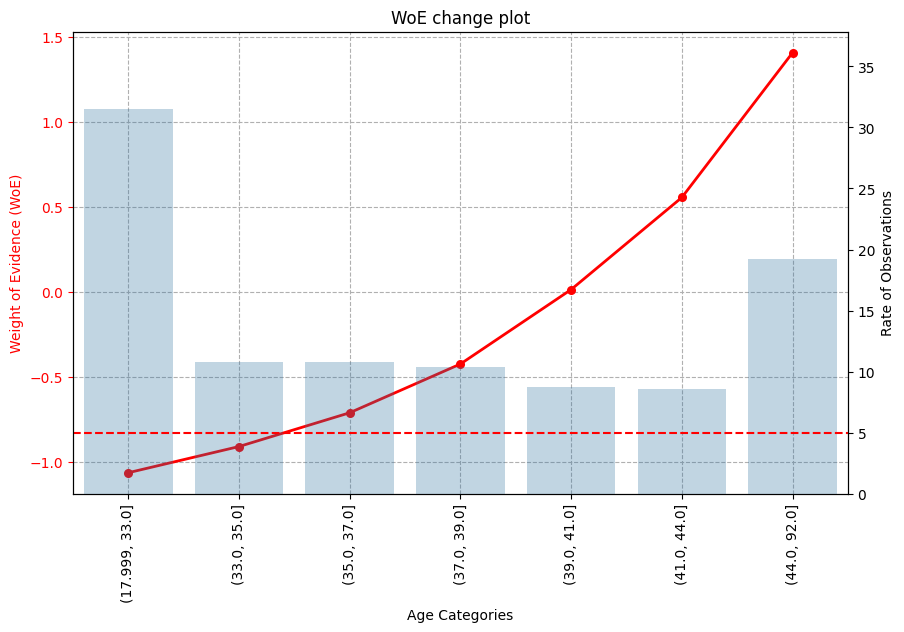

In [29]:

fig, ax1 = plt.subplots(figsize=(10, 6))  # Asosiy grafik uchun ax1 fig'ni aniqlash
ax2 = ax1.twinx()  # Ikkinchi y-o'qi (ax2) yaratish

# Birinchi y-o'qi uchun pointplot (WoE)
sns.pointplot(data=df_woe, x='Age_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')

# X-o'q nomi va x-belgilarining burilishi
ax1.set_xlabel('Age Categories')
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Ikkinchi y-o'qi uchun barplot (kuzatuvlar foizi)
sns.barplot(data=df_woe, x='Age_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Y-limitlarini sozlash
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)  # Gorizontal qizil chiziq qo'shish

# Grafiklar uchun grid va title
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()


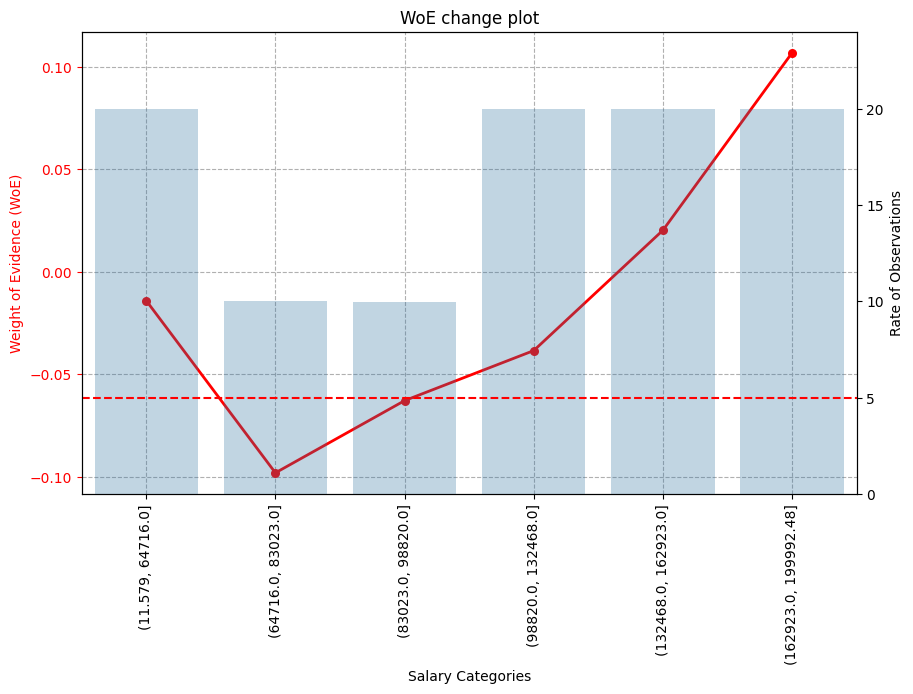

In [30]:

fig, ax1 = plt.subplots(figsize=(10, 6))  # Asosiy grafik uchun ax1 fig'ni aniqlash
ax2 = ax1.twinx()  # Ikkinchi y-o'qi (ax2) yaratish

# Birinchi y-o'qi uchun pointplot (WoE)
sns.pointplot(data=df_woe2, x='Salary_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')

# X-o'q nomi va x-belgilarining burilishi
ax1.set_xlabel('Salary Categories')
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# Ikkinchi y-o'qi uchun barplot (kuzatuvlar foizi)
sns.barplot(data=df_woe2, x='Salary_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe2['Percent of Observations'].max() * 1.2)  # Y-limitlarini sozlash
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)  # Gorizontal qizil chiziq qo'shish

# Grafiklar uchun grid va title
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()


In [31]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Cat,Age_Cat_Encoded,Salary_Cat,Salary_encode
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,"(17.999, 33.0]",0,"(162923.0, 199992.48]",2
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,"(17.999, 33.0]",0,"(11.579, 64716.0]",0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,"(39.0, 41.0]",4,"(162923.0, 199992.48]",2
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,"(33.0, 35.0]",1,"(83023.0, 98820.0]",4
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,"(17.999, 33.0]",0,"(11.579, 64716.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,"(17.999, 33.0]",0,"(98820.0, 132468.0]",5
165030,165030,15665521,Okechukwu,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,"(33.0, 35.0]",1,"(98820.0, 132468.0]",5
165031,165031,15664752,Hsia,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,"(17.999, 33.0]",0,"(98820.0, 132468.0]",5
165032,165032,15689614,Hsiung,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,"(17.999, 33.0]",0,"(64716.0, 83023.0]",3


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# X va y ni ajratish
X = df[['Age_Cat_Encoded', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Balance', 'Tenure', 'Gender', 'CreditScore', 'Salary_encode']]
y = df['Exited']

# Train-test bo'linishi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistik regressiya uchun parametrlar to'plami
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regulyarizatsiya kuchi
    'max_iter': [5000],             # Iteratsiya soni, 5000 martta aylanish
    'solver': ['liblinear', 'lbfgs'] # Optimallashtiruvchi algoritmlar
}

# LogisticRegression modeli va GridSearchCV
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation bilan
grid_search.fit(X_train, y_train)

# Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# Eng yaxshi model yordamida bashorat qilish
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Aniqlik darajasini hisoblash
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelning aniqlik darajasi: {accuracy:.2f}")

# Cross-validation natijalari
cv_results = grid_search.cv_results_
mean_cv_score = grid_search.best_score_
print(f"Cross-Validationning o'rtacha aniqlik darajasi: {mean_cv_score:.2f}")


Eng yaxshi parametrlar: {'C': 0.01, 'max_iter': 5000, 'solver': 'lbfgs'}
Modelning aniqlik darajasi: 0.83
Cross-Validationning o'rtacha aniqlik darajasi: 0.83


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# X va y ni ajratish
X = df[['Age_Cat_Encoded', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Balance', 'Tenure', 'Gender', 'CreditScore', 'Salary_encode']]
y = df['Exited']

# Train-test bo'linishi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline yaratish
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ma'lumotlarni masshtablash
    ('log_reg', LogisticRegression())  # Logistik regressiya
])

# Logistik regressiya uchun parametrlar to'plami
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],  # Regulyarizatsiya kuchi
    'log_reg__max_iter': [5000],             # Iteratsiya soni
    'log_reg__solver': ['liblinear', 'lbfgs']  # Optimallashtiruvchi algoritmlar
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation bilan
grid_search.fit(X_train, y_train)

# Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# Eng yaxshi model yordamida bashorat qilish
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Aniqlik darajasini hisoblash
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelning aniqlik darajasi: {accuracy:.2f}")

# Cross-validation natijalari
cv_results = grid_search.cv_results_
mean_cv_score = grid_search.best_score_
print(f"Cross-Validationning o'rtacha aniqlik darajasi: {mean_cv_score:.2f}")


Eng yaxshi parametrlar: {'log_reg__C': 0.01, 'log_reg__max_iter': 5000, 'log_reg__solver': 'lbfgs'}
Modelning aniqlik darajasi: 0.83
Cross-Validationning o'rtacha aniqlik darajasi: 0.83


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Xususiyatlarni va maqsadni ajratish
X = df[['Age_Cat_Encoded', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Balance', 'Tenure', 'Gender', 'CreditScore', 'Salary_encode']]
y = df['Exited']

# Train-test bo'linishi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistik regressiya uchun parametrlar to'plami
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],  # Regulyarizatsiya kuchi
    'log_reg__max_iter': [5000],             # Iteratsiya soni, 5000 martta aylanish
    'log_reg__solver': ['liblinear', 'lbfgs'] # Optimallashtiruvchi algoritmlar
}

# Pipeline yaratish (masshtablash va logistik regressiyani birlashtirish)
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Masshtablash
    ('log_reg', LogisticRegression())            # Logistik regressiya
])

# GridSearchCV yordamida eng yaxshi parametrlarni qidirish
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# Eng yaxshi model yordamida bashorat qilish
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Aniqlik darajasini hisoblash
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelning aniqlik darajasi: {accuracy:.2f}")

# Cross-validation natijalari
mean_cv_score = grid_search.best_score_
print(f"Cross-Validationning o'rtacha aniqlik darajasi: {mean_cv_score:.2f}")


Eng yaxshi parametrlar: {'log_reg__C': 0.01, 'log_reg__max_iter': 5000, 'log_reg__solver': 'lbfgs'}
Modelning aniqlik darajasi: 0.83
Cross-Validationning o'rtacha aniqlik darajasi: 0.83


In [237]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

X = df[['Age_Cat_Encoded', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Balance', 'Tenure', 'Gender', 'CreditScore', 'Salary_encode']]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistik regressiya modeli
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Test setda bashorat qilish
y_pred = log_reg.predict(X_test)

# Modelning aniqlik darajasini chiqarish
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelning aniqlik darajasi: {accuracy:.2f}")

Modelning aniqlik darajasi: 0.83


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step


ROC AUC qiymati: 0.81


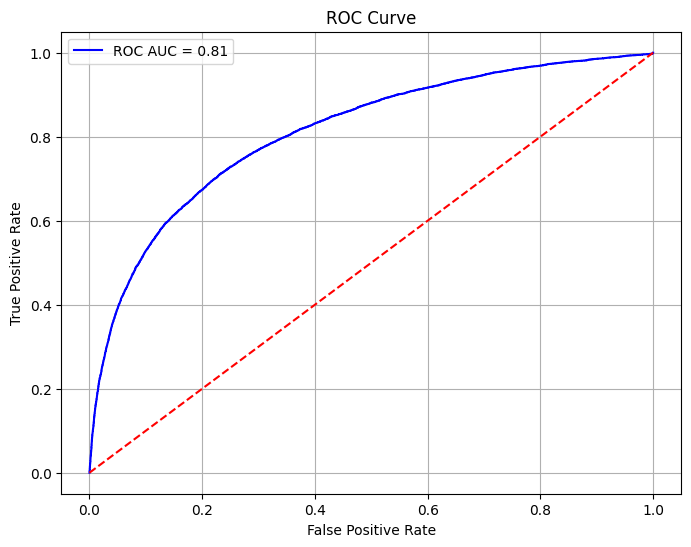

In [238]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Modelning ehtimolliklarini hisoblash
y_prob = log_reg.predict_proba(X_test)[:, 1]

# ROC Curve uchun fpr (false positive rate) va tpr (true positive rate)ni olish
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# ROC AUC qiymatini hisoblash
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC qiymati: {roc_auc:.2f}")

# Thresholdlarni oraliqda belgilash (100 nuqta masalan)
num_points = 100
thresholds_selected = np.linspace(thresholds.min(), thresholds.max(), num_points)

# ROC Curve chizish
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


ROC AUC qiymati: 0.81


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\function_base.py:168: RuntimeWarning: invalid value encountered in multiply
  y *= step


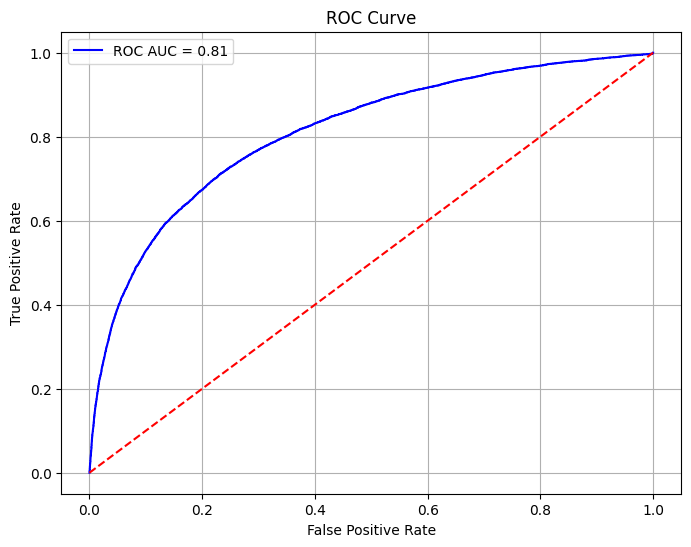

Eng yaxshi threshold: 0.23438284997974168


In [239]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC qiymati: {roc_auc:.2f}")

num_points = 100
thresholds_selected = np.linspace(thresholds.min(), thresholds.max(), num_points)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Eng yaxshi thresholdni tanlash
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Eng yaxshi threshold: {optimal_threshold}")


In [240]:
y_pred_prob = log_reg.predict(df_test[['Age_Cat_Encoded', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Balance', 'Tenure', 'Gender', 'CreditScore', 'Salary_encode']])

In [241]:
sample = pd.read_csv('sample_submission.csv')
sample['Exited'] = y_pred_prob
sample.to_csv('2_urinish.csv', index=False)

In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Ma'lumotlar
X = df[['Age_Cat_Encoded', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Balance', 'Tenure', 'Gender', 'Geography', 'CreditScore', 'Salary_encode']]
y = df['Exited']

#

# Standartizatsiya qilish (faqat sonli ustunlar uchun)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test bo'linishi
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Hyperparametrlarni sozlash uchun grid qidiruv
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = LogisticRegression(class_weight='balanced')

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Eng yaxshi modelni olish
best_model = grid_search.best_estimator_

# Test setda bashorat qilish
y_pred = best_model.predict(X_test)

# Modelning aniqlik darajasini chiqarish
accuracy = accuracy_score(y_test, y_pred)
print(f"Yaxshilangan modelning aniqlik darajasi: {accuracy:.2f}")

# ROC AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC qiymati: {roc_auc:.2f}")


Yaxshilangan modelning aniqlik darajasi: 0.74
ROC AUC qiymati: 0.82


In [244]:
y_pred_prob = best_model.predict(df_test[['Age_Cat_Encoded', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Balance', 'Tenure', 'Gender', 'Geography', 'CreditScore', 'Salary_encode']])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [250]:
sample = pd.read_csv('sample_submission.csv')
sample['Exited'] = y_pred_prob
sample.to_csv('6_urinish.csv', index=False)

In [246]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Cat,Age_Cat_Encoded,Salary_Cat,Salary_encode
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,"(17.999, 33.0]",0,"(162923.0, 199992.48]",2
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,"(17.999, 33.0]",0,"(11.579, 64716.0]",0
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,"(39.0, 41.0]",4,"(162923.0, 199992.48]",2
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,"(33.0, 35.0]",1,"(83023.0, 98820.0]",4
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,"(17.999, 33.0]",0,"(11.579, 64716.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,"(17.999, 33.0]",0,"(98820.0, 132468.0]",5
165030,165030,15665521,Okechukwu,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,"(33.0, 35.0]",1,"(98820.0, 132468.0]",5
165031,165031,15664752,Hsia,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,"(17.999, 33.0]",0,"(98820.0, 132468.0]",5
165032,165032,15689614,Hsiung,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,"(17.999, 33.0]",0,"(64716.0, 83023.0]",3


In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# X va y qiymatlarini tanlab olish
X = df[['Age', 'IsActiveMember', 'HasCrCard', 'NumOfProducts', 'Balance', 'Tenure', 'Gender', 'Geography', 'CreditScore', 'EstimatedSalary']]
y = df['Exited']

# Train-test bo'linmasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Xususiyatlarni o'lchash uchun StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistik regressiya modeli, regularizatsiya kuchini sozlash
log_reg = LogisticRegression(C=0.5, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Test setda bashorat qilish
y_pred = log_reg.predict(X_test_scaled)

# Modelning aniqlik darajasini chiqarish
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelning aniqlik darajasi: {accuracy:.2f}")


Modelning aniqlik darajasi: 0.83


In [248]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# 1. Ma'lumotlarni yuklash
df = pd.read_csv('train.csv')

# 2. Surname bo'sh qiymatlarini olib tashlash
df = df.dropna(subset=['Surname'])

# 3. Kategorik ustunlarni kodlash (Gender va Geography)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Geography ustunini One-Hot Encoding qilish
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 4. Yangi xususiyatlar yaratish (feature engineering)
df['Balance_to_Salary'] = df['Balance'] / df['EstimatedSalary']
df['Tenure_to_Age'] = df['Tenure'] / df['Age']
df['CreditScore_to_Age'] = df['CreditScore'] / df['Age']
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['CreditScore_IsActive'] = df['CreditScore'] * df['IsActiveMember']

# 5. Polynomial features yaratish
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(df[['CreditScore', 'Age', 'Balance']])

# Polynomial featuresni dataframega qo'shish
poly_df = pd.DataFrame(poly_features, columns=[f'poly_{i}' for i in range(poly_features.shape[1])])
df = pd.concat([df, poly_df], axis=1)

# 6. Maqsadli ustun va xususiyatlarni ajratish
X = df.drop(columns=['Exited', 'Surname', 'CustomerId', 'id'])  # Maqsadli ustun va keraksiz ustunlarni olib tashlaymiz
y = df['Exited']

# 7. Ma'lumotlarni masshtablash
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Trening va test ma'lumotlarini bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 9. Model yaratish va o'qitish
model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(X_train, y_train)

# 10. ROC AUC hisoblash
y_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

# 11. Test ma'lumotlarini yuklash va tayyorlash
df_test = pd.read_csv('test.csv').dropna(subset=['Surname'])

# Kategorik xususiyatlarni kodlash
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test = pd.get_dummies(df_test, columns=['Geography'], drop_first=True)

# Yangi xususiyatlar yaratish (test ma'lumotlarida)
df_test['Balance_to_Salary'] = df_test['Balance'] / df_test['EstimatedSalary']
df_test['Tenure_to_Age'] = df_test['Tenure'] / df_test['Age']
df_test['CreditScore_to_Age'] = df_test['CreditScore'] / df_test['Age']
df_test['Balance_NumOfProducts'] = df_test['Balance'] * df_test['NumOfProducts']
df_test['CreditScore_IsActive'] = df_test['CreditScore'] * df_test['IsActiveMember']

# Polynomial features test set uchun yaratish
poly_test_features = poly.transform(df_test[['CreditScore', 'Age', 'Balance']])
poly_test_df = pd.DataFrame(poly_test_features, columns=[f'poly_{i}' for i in range(poly_test_features.shape[1])])
df_test = pd.concat([df_test, poly_test_df], axis=1)

# Test ma'lumotlarini masshtablash
X_test_scaled = scaler.transform(df_test.drop(columns=['Surname', 'CustomerId', 'id']))

# Test to'plamida ehtimollarni bashorat qilish
y_test_prob = model.predict_proba(X_test_scaled)[:,1]

# 12. Bashoratlarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['Exited'] = y_test_prob
subm.to_csv("4_urinish.csv", index=False)


ROC-AUC: 0.8301244848737354


In [249]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# WoE va IV ni hisoblash uchun funksiyani yarataylik
def WoE(df, feature_name, target_name):
    woe_table = pd.crosstab(df[feature_name], df[target_name], normalize='columns')
    woe_table['WoE'] = np.log(woe_table[1] / woe_table[0])
    return woe_table

# 1. Ma'lumotlarni yuklash
df = pd.read_csv('train.csv')

# 2. Surname bo'sh qiymatlarini olib tashlash
df = df.dropna(subset=['Surname'])

# 3. Kategorik ustunlarni kodlash (Gender va Geography)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Geography ustunini One-Hot Encoding qilish
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 4. Yangi xususiyatlar yaratish (feature engineering)
df['Balance_to_Salary'] = df['Balance'] / df['EstimatedSalary']
df['Tenure_to_Age'] = df['Tenure'] / df['Age']
df['CreditScore_to_Age'] = df['CreditScore'] / df['Age']
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['CreditScore_IsActive'] = df['CreditScore'] * df['IsActiveMember']

# 5. Polynomial features yaratish
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly_features = poly.fit_transform(df[['CreditScore', 'Age', 'Balance']])

# Polynomial featuresni dataframega qo'shish
poly_df = pd.DataFrame(poly_features, columns=[f'poly_{i}' for i in range(poly_features.shape[1])])
df = pd.concat([df, poly_df], axis=1)

# 6. Matthews correlation coefficient hisoblash
phi_coefficient1 = matthews_corrcoef(df['HasCrCard'], df['Exited'])
phi_coefficient2 = matthews_corrcoef(df['IsActiveMember'], df['Exited'])
print(f"Phi coefficient for HasCrCard: {phi_coefficient1}")
print(f"Phi coefficient for IsActiveMember: {phi_coefficient2}")

# 7. WoE jadvalini yaratish (Geography uchun)
woe_table_geo = WoE(df, feature_name='Geography_Germany', target_name='Exited')
print("WoE table for Geography_Germany:")
print(woe_table_geo)

# 8. Maqsadli ustun va xususiyatlarni ajratish
X = df.drop(columns=['Exited', 'Surname', 'CustomerId', 'id'])  # Maqsadli ustun va keraksiz ustunlarni olib tashlaymiz
y = df['Exited']

# 9. Ma'lumotlarni masshtablash
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 10. Trening va test ma'lumotlarini bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 11. GridSearchCV bilan logistik regressiya uchun eng yaxshi parametrlarni qidirish
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

log_reg = LogisticRegression(class_weight='balanced')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# 12. Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# 13. Eng yaxshi model yordamida ROC AUC hisoblash
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

# 14. Test ma'lumotlarini yuklash va tayyorlash
df_test = pd.read_csv('test.csv').dropna(subset=['Surname'])

# Kategorik xususiyatlarni kodlash
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test = pd.get_dummies(df_test, columns=['Geography'], drop_first=True)

# Yangi xususiyatlar yaratish (test ma'lumotlarida)
df_test['Balance_to_Salary'] = df_test['Balance'] / df_test['EstimatedSalary']
df_test['Tenure_to_Age'] = df_test['Tenure'] / df_test['Age']
df_test['CreditScore_to_Age'] = df_test['CreditScore'] / df_test['Age']
df_test['Balance_NumOfProducts'] = df_test['Balance'] * df_test['NumOfProducts']
df_test['CreditScore_IsActive'] = df_test['CreditScore'] * df_test['IsActiveMember']

# Polynomial features test set uchun yaratish
poly_test_features = poly.transform(df_test[['CreditScore', 'Age', 'Balance']])
poly_test_df = pd.DataFrame(poly_test_features, columns=[f'poly_{i}' for i in range(poly_test_features.shape[1])])
df_test = pd.concat([df_test, poly_test_df], axis=1)

# Test ma'lumotlarini masshtablash
X_test_scaled = scaler.transform(df_test.drop(columns=['Surname', 'CustomerId', 'id']))

# Test to'plamida ehtimollarni bashorat qilish
y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# 15. Bashoratlarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['Exited'] = y_test_prob
subm.to_csv("5_urinish.csv", index=False)


Phi coefficient for HasCrCard: -0.022141333072306698
Phi coefficient for IsActiveMember: -0.21023702579213763
WoE table for Geography_Germany:
Exited                    0         1       WoE
Geography_Germany                              
False              0.834821  0.624467 -0.290319
True               0.165179  0.375533  0.821315
Eng yaxshi parametrlar: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
ROC-AUC: 0.8301315837210151


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import roc_auc_score, matthews_corrcoef
import numpy as np

# WoE va IV ni hisoblash uchun funksiyani yarataylik
def WoE(df, feature_name, target_name):
    crosstab = pd.crosstab(df[feature_name], df[target_name], normalize='columns')
    crosstab['WoE'] = np.log((crosstab[1] + 1e-6) / (crosstab[0] + 1e-6))  # nolga bo'linishdan qochish
    return crosstab

# 1. Ma'lumotlarni yuklash
df = pd.read_csv('train.csv')

# 2. Surname bo'sh qiymatlarini olib tashlash
df = df.dropna(subset=['Surname'])

# 3. Kategorik ustunlarni kodlash (Gender va Geography)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Geography ustunini One-Hot Encoding qilish
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 4. Yangi xususiyatlar yaratish (feature engineering)
df['Balance_to_Salary'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)  # nolga bo'linishdan qochish
df['Tenure_to_Age'] = df['Tenure'] / (df['Age'] + 1e-6)
df['CreditScore_to_Age'] = df['CreditScore'] / (df['Age'] + 1e-6)
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['CreditScore_IsActive'] = df['CreditScore'] * df['IsActiveMember']

# 5. Polynomial features yaratish
poly = PolynomialFeatures(degree=2, interaction_only=False)  # Kvadratik xususiyatlarni ham qo'shish uchun
poly_features = poly.fit_transform(df[['CreditScore', 'Age', 'Balance']])

# Polynomial featuresni dataframega qo'shish
poly_df = pd.DataFrame(poly_features, columns=[f'poly_{i}' for i in range(poly_features.shape[1])])
df = pd.concat([df, poly_df], axis=1)

# 6. Matthews correlation coefficient hisoblash
phi_coefficient1 = matthews_corrcoef(df['HasCrCard'], df['Exited'])
phi_coefficient2 = matthews_corrcoef(df['IsActiveMember'], df['Exited'])
print(f"Phi coefficient for HasCrCard: {phi_coefficient1}")
print(f"Phi coefficient for IsActiveMember: {phi_coefficient2}")

# 7. WoE jadvalini yaratish (Geography uchun)
woe_table_geo = WoE(df, feature_name='Geography_Germany', target_name='Exited')
print("WoE table for Geography_Germany:")
print(woe_table_geo)

# 8. Maqsadli ustun va xususiyatlarni ajratish
X = df.drop(columns=['Exited', 'Surname', 'CustomerId', 'id'])  # Maqsadli ustun va keraksiz ustunlarni olib tashlaymiz
y = df['Exited']

# 9. Ma'lumotlarni masshtablash
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 10. Trening va test ma'lumotlarini bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 11. GridSearchCV bilan logistik regressiya uchun eng yaxshi parametrlarni qidirish
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

log_reg = LogisticRegression(class_weight='balanced')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# 12. Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# 13. Eng yaxshi model yordamida ROC AUC hisoblash
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

# 14. Test ma'lumotlarini yuklash va tayyorlash
df_test = pd.read_csv('test.csv').dropna(subset=['Surname'])

# Kategorik xususiyatlarni kodlash
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test = pd.get_dummies(df_test, columns=['Geography'], drop_first=True)

# Yangi xususiyatlar yaratish (test ma'lumotlarida)
df_test['Balance_to_Salary'] = df_test['Balance'] / (df_test['EstimatedSalary'] + 1e-6)
df_test['Tenure_to_Age'] = df_test['Tenure'] / (df_test['Age'] + 1e-6)
df_test['CreditScore_to_Age'] = df_test['CreditScore'] / (df_test['Age'] + 1e-6)
df_test['Balance_NumOfProducts'] = df_test['Balance'] * df_test['NumOfProducts']
df_test['CreditScore_IsActive'] = df_test['CreditScore'] * df_test['IsActiveMember']

# Polynomial features test set uchun yaratish
poly_test_features = poly.transform(df_test[['CreditScore', 'Age', 'Balance']])
poly_test_df = pd.DataFrame(poly_test_features, columns=[f'poly_{i}' for i in range(poly_test_features.shape[1])])
df_test = pd.concat([df_test, poly_test_df], axis=1)

# Test ma'lumotlarini masshtablash
X_test_scaled = scaler.transform(df_test.drop(columns=['Surname', 'CustomerId', 'id']))

# Test to'plamida ehtimollarni bashorat qilish
y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# 15. Bashoratlarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['Exited'] = y_test_prob
subm.to_csv("7_urinish.csv", index=False)


Phi coefficient for HasCrCard: -0.022141333072306698
Phi coefficient for IsActiveMember: -0.21023702579213763
WoE table for Geography_Germany:
Exited                    0         1       WoE
Geography_Germany                              
False              0.834821  0.624467 -0.290318
True               0.165179  0.375533  0.821311


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Eng yaxshi parametrlar: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
ROC-AUC: 0.8381848012108788


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import roc_auc_score, matthews_corrcoef
import numpy as np

# WoE va IV ni hisoblash uchun funksiyani yarataylik
def WoE(df, feature_name, target_name):
    crosstab = pd.crosstab(df[feature_name], df[target_name], normalize='columns')
    crosstab['WoE'] = np.log((crosstab[1] + 1e-6) / (crosstab[0] + 1e-6))  # nolga bo'linishdan qochish
    return crosstab

# 1. Ma'lumotlarni yuklash
df = pd.read_csv('train.csv')

# 2. Surname bo'sh qiymatlarini olib tashlash
df = df.dropna(subset=['Surname'])

# 3. Kategorik ustunlarni kodlash (Gender va Geography)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Geography ustunini One-Hot Encoding qilish
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 4. Yangi xususiyatlar yaratish (feature engineering)
df['Balance_to_Salary'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)  # nolga bo'linishdan qochish
df['Tenure_to_Age'] = df['Tenure'] / (df['Age'] + 1e-6)
df['CreditScore_to_Age'] = df['CreditScore'] / (df['Age'] + 1e-6)
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['CreditScore_IsActive'] = df['CreditScore'] * df['IsActiveMember']

# 5. Polynomial features yaratish
poly = PolynomialFeatures(degree=2, interaction_only=False)  # Kvadratik xususiyatlarni ham qo'shish uchun
poly_features = poly.fit_transform(df[['CreditScore', 'Age', 'Balance']])

# Polynomial featuresni dataframega qo'shish
poly_df = pd.DataFrame(poly_features, columns=[f'poly_{i}' for i in range(poly_features.shape[1])])
df = pd.concat([df, poly_df], axis=1)

# 6. Matthews correlation coefficient hisoblash
phi_coefficient1 = matthews_corrcoef(df['HasCrCard'], df['Exited'])
phi_coefficient2 = matthews_corrcoef(df['IsActiveMember'], df['Exited'])
print(f"Phi coefficient for HasCrCard: {phi_coefficient1}")
print(f"Phi coefficient for IsActiveMember: {phi_coefficient2}")

# 7. WoE jadvalini yaratish (Geography uchun)
woe_table_geo = WoE(df, feature_name='Geography_Germany', target_name='Exited')
print("WoE table for Geography_Germany:")
print(woe_table_geo)

# 8. Maqsadli ustun va xususiyatlarni ajratish
X = df.drop(columns=['Exited', 'Surname', 'CustomerId', 'id'])  # Maqsadli ustun va keraksiz ustunlarni olib tashlaymiz
y = df['Exited']

# 9. Ma'lumotlarni masshtablash
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 10. Trening va test ma'lumotlarini bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 11. GridSearchCV bilan logistik regressiya uchun eng yaxshi parametrlarni qidirish
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

log_reg = LogisticRegression(class_weight='balanced')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# 12. Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# 13. Eng yaxshi model yordamida ROC AUC hisoblash
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

# 14. Cross-Validation bilan modelni baholash
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC: {np.mean(cv_scores)}")

# 15. Random Forest va Gradient Boosting modellarini yaratish
rf_model = RandomForestClassifier(class_weight='balanced')
gb_model = GradientBoostingClassifier()

# Voting Classifier yordamida ansambl yaratish
voting_model = VotingClassifier(estimators=[
    ('logreg', best_model), 
    ('rf', rf_model), 
    ('gb', gb_model)
], voting='soft')  # 'soft' ishlashda ehtimoliy bashoratlarni foydalanadi

# 16. Voting Classifier modelini o'qitish
voting_model.fit(X_train, y_train)

# 17. ROC AUC ni hisoblash
y_prob_voting = voting_model.predict_proba(X_test)[:, 1]
roc_auc_voting = roc_auc_score(y_test, y_prob_voting)
print(f"ROC-AUC for Voting Classifier: {roc_auc_voting}")

# 18. Test ma'lumotlarini yuklash va tayyorlash
df_test = pd.read_csv('test.csv').dropna(subset=['Surname'])

# Kategorik xususiyatlarni kodlash
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test = pd.get_dummies(df_test, columns=['Geography'], drop_first=True)

# Yangi xususiyatlar yaratish (test ma'lumotlarida)
df_test['Balance_to_Salary'] = df_test['Balance'] / (df_test['EstimatedSalary'] + 1e-6)
df_test['Tenure_to_Age'] = df_test['Tenure'] / (df_test['Age'] + 1e-6)
df_test['CreditScore_to_Age'] = df_test['CreditScore'] / (df_test['Age'] + 1e-6)
df_test['Balance_NumOfProducts'] = df_test['Balance'] * df_test['NumOfProducts']
df_test['CreditScore_IsActive'] = df_test['CreditScore'] * df_test['IsActiveMember']

# Polynomial features test set uchun yaratish
poly_test_features = poly.transform(df_test[['CreditScore', 'Age', 'Balance']])
poly_test_df = pd.DataFrame(poly_test_features, columns=[f'poly_{i}' for i in range(poly_test_features.shape[1])])
df_test = pd.concat([df_test, poly_test_df], axis=1)

# Test ma'lumotlarini masshtablash
X_test_scaled = scaler.transform(df_test.drop(columns=['Surname', 'CustomerId', 'id']))

# Test to'plamida ehtimollarni bashorat qilish
y_test_prob = voting_model.predict_proba(X_test_scaled)[:, 1]

# 19. Bashoratlarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['Exited'] = y_test_prob
subm.to_csv("8_urinish.csv", index=False)


Phi coefficient for HasCrCard: -0.022141333072306698
Phi coefficient for IsActiveMember: -0.21023702579213763
WoE table for Geography_Germany:
Exited                    0         1       WoE
Geography_Germany                              
False              0.834821  0.624467 -0.290318
True               0.165179  0.375533  0.821311


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Eng yaxshi parametrlar: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
ROC-AUC: 0.8381848012108788
Cross-Validation ROC-AUC: 0.8386993443395164
ROC-AUC for Voting Classifier: 0.8821076814417719


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Eng yaxshi parametrlar: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
ROC AUC: 0.8381848012108788


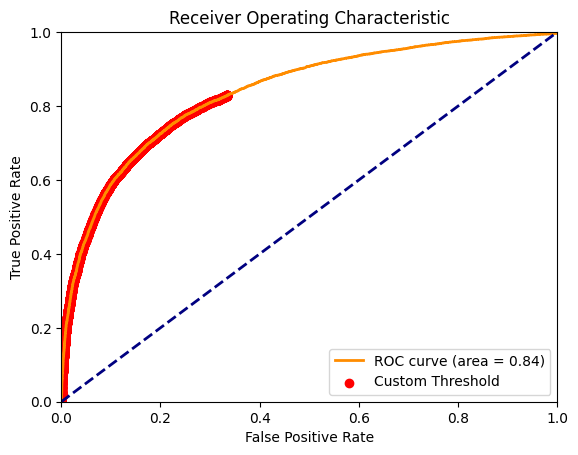

Yangilangan ROC-AUC (threshold=0.4): 0.746804915457555
Cross-Validation ROC-AUC: 0.8386993443395164


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# WoE va IV ni hisoblash uchun funksiyani yarataylik
def WoE(df, feature_name, target_name):
    crosstab = pd.crosstab(df[feature_name], df[target_name], normalize='columns')
    crosstab['WoE'] = np.log((crosstab[1] + 1e-6) / (crosstab[0] + 1e-6))  # nolga bo'linishdan qochish
    return crosstab

# 1. Ma'lumotlarni yuklash
df = pd.read_csv('train.csv')

# 2. Surname bo'sh qiymatlarini olib tashlash
df = df.dropna(subset=['Surname'])

# 3. Kategorik ustunlarni kodlash (Gender va Geography)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Geography ustunini One-Hot Encoding qilish
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 4. Yangi xususiyatlar yaratish (feature engineering)
df['Balance_to_Salary'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)  # nolga bo'linishdan qochish
df['Tenure_to_Age'] = df['Tenure'] / (df['Age'] + 1e-6)
df['CreditScore_to_Age'] = df['CreditScore'] / (df['Age'] + 1e-6)
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['CreditScore_IsActive'] = df['CreditScore'] * df['IsActiveMember']

# 5. Polynomial features yaratish
poly = PolynomialFeatures(degree=2, interaction_only=False)  # Kvadratik xususiyatlarni ham qo'shish uchun
poly_features = poly.fit_transform(df[['CreditScore', 'Age', 'Balance']])

# Polynomial featuresni dataframega qo'shish
poly_df = pd.DataFrame(poly_features, columns=[f'poly_{i}' for i in range(poly_features.shape[1])])
df = pd.concat([df, poly_df], axis=1)

# 6. Maqsadli ustun va xususiyatlarni ajratish
X = df.drop(columns=['Exited', 'Surname', 'CustomerId', 'id'])  # Maqsadli ustun va keraksiz ustunlarni olib tashlaymiz
y = df['Exited']

# 7. Ma'lumotlarni masshtablash
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Trening va test ma'lumotlarini bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 9. GridSearchCV bilan logistik regressiya uchun eng yaxshi parametrlarni qidirish
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

log_reg = LogisticRegression(class_weight='balanced')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# 10. Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# 11. Eng yaxshi model yordamida ehtimollarni olish
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]

# 12. ROC curve va AUC hisoblash
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

# 13. Ehtimolliklar bo'yicha thresholdlarni o'zgartirish
# Masalan, threshold 0.4 ga o'rnatamiz
threshold = 0.4
y_pred_custom = (y_prob >= threshold).astype(int)

# 14. ROC curve ni chizish
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[np.where(thresholds >= threshold)], tpr[np.where(thresholds >= threshold)], color='red', label='Custom Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 15. Yangilangan ROC AUC
new_roc_auc = roc_auc_score(y_test, y_pred_custom)
print(f"Yangilangan ROC-AUC (threshold={threshold}): {new_roc_auc}")

# 16. Cross-Validation bilan modelni baholash
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC: {np.mean(cv_scores)}")

# 17. Test ma'lumotlarini yuklash va tayyorlash
df_test = pd.read_csv('test.csv').dropna(subset=['Surname'])

# Kategorik xususiyatlarni kodlash
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test = pd.get_dummies(df_test, columns=['Geography'], drop_first=True)

# Yangi xususiyatlar yaratish (test ma'lumotlarida)
df_test['Balance_to_Salary'] = df_test['Balance'] / (df_test['EstimatedSalary'] + 1e-6)
df_test['Tenure_to_Age'] = df_test['Tenure'] / (df_test['Age'] + 1e-6)
df_test['CreditScore_to_Age'] = df_test['CreditScore'] / (df_test['Age'] + 1e-6)
df_test['Balance_NumOfProducts'] = df_test['Balance'] * df_test['NumOfProducts']
df_test['CreditScore_IsActive'] = df_test['CreditScore'] * df_test['IsActiveMember']

# Polynomial features test set uchun yaratish
poly_test_features = poly.transform(df_test[['CreditScore', 'Age', 'Balance']])
poly_test_df = pd.DataFrame(poly_test_features, columns=[f'poly_{i}' for i in range(poly_test_features.shape[1])])
df_test = pd.concat([df_test, poly_test_df], axis=1)

# Test ma'lumotlarini masshtablash
X_test_scaled = scaler.transform(df_test.drop(columns=['Surname', 'CustomerId', 'id']))

# Test to'plamida ehtimollarni bashorat qilish
y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# 18. Bashoratlarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['Exited'] = y_test_prob
subm.to_csv("8_urinish.csv", index=False)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# WoE va IV ni hisoblash uchun funksiyani yarataylik
def WoE(df, feature_name, target_name):
    crosstab = pd.crosstab(df[feature_name], df[target_name], normalize='columns')
    crosstab['WoE'] = np.log((crosstab[1] + 1e-6) / (crosstab[0] + 1e-6))  # nolga bo'linishdan qochish
    return crosstab

# 1. Ma'lumotlarni yuklash
df = pd.read_csv('train.csv')

# 2. Surname bo'sh qiymatlarini olib tashlash
df = df.dropna(subset=['Surname'])

# 3. Kategorik ustunlarni kodlash (Gender va Geography)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Geography ustunini One-Hot Encoding qilish
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 4. Yangi xususiyatlar yaratish (feature engineering)
df['Balance_to_Salary'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)  # nolga bo'linishdan qochish
df['Tenure_to_Age'] = df['Tenure'] / (df['Age'] + 1e-6)
df['CreditScore_to_Age'] = df['CreditScore'] / (df['Age'] + 1e-6)
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['CreditScore_IsActive'] = df['CreditScore'] * df['IsActiveMember']

# 5. Polynomial features yaratish
poly = PolynomialFeatures(degree=2, interaction_only=False)  # Kvadratik xususiyatlarni ham qo'shish uchun
poly_features = poly.fit_transform(df[['CreditScore', 'Age', 'Balance']])

# Polynomial featuresni dataframega qo'shish
poly_df = pd.DataFrame(poly_features, columns=[f'poly_{i}' for i in range(poly_features.shape[1])])
df = pd.concat([df, poly_df], axis=1)

# 6. Maqsadli ustun va xususiyatlarni ajratish
X = df.drop(columns=['Exited', 'Surname', 'CustomerId', 'id'])  # Maqsadli ustun va keraksiz ustunlarni olib tashlaymiz
y = df['Exited']

# 7. Ma'lumotlarni masshtablash
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Trening va test ma'lumotlarini bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 9. Logistic Regression va Ridge Classifier modelini yarating
log_reg = LogisticRegression(class_weight='balanced')
ridge_clf = RidgeClassifier(class_weight='balanced')

# 10. GridSearchCV bilan optimal parametrlarni topish
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'ridge_clf__alpha': [0.01, 0.1, 1, 10]
}

# 11. Voting Classifier yordamida ansambl yaratish
voting_clf = VotingClassifier(estimators=[('log_reg', log_reg), ('ridge_clf', ridge_clf)], voting='soft')

# 12. Parametrlarni qidirish va trening qilish
grid_search = GridSearchCV(voting_clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# 13. Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# 14. Eng yaxshi model yordamida ehtimollarni olish
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]

# 15. ROC curve va AUC hisoblash
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

# 16. ROC curve ni chizish
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 17. Cross-Validation bilan modelni baholash
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC: {np.mean(cv_scores)}")

# 18. Test ma'lumotlarini yuklash va tayyorlash
df_test = pd.read_csv('test.csv').dropna(subset=['Surname'])

# Kategorik xususiyatlarni kodlash
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test = pd.get_dummies(df_test, columns=['Geography'], drop_first=True)

# Yangi xususiyatlar yaratish (test ma'lumotlarida)
df_test['Balance_to_Salary'] = df_test['Balance'] / (df_test['EstimatedSalary'] + 1e-6)
df_test['Tenure_to_Age'] = df_test['Tenure'] / (df_test['Age'] + 1e-6)
df_test['CreditScore_to_Age'] = df_test['CreditScore'] / (df_test['Age'] + 1e-6)
df_test['Balance_NumOfProducts'] = df_test['Balance'] * df_test['NumOfProducts']
df_test['CreditScore_IsActive'] = df_test['CreditScore'] * df_test['IsActiveMember']

# Polynomial features test set uchun yaratish
poly_test_features = poly.transform(df_test[['CreditScore', 'Age', 'Balance']])
poly_test_df = pd.DataFrame(poly_test_features, columns=[f'poly_{i}' for i in range(poly_test_features.shape[1])])
df_test = pd.concat([df_test, poly_test_df], axis=1)

# Test ma'lumotlarini masshtablash
X_test_scaled = scaler.transform(df_test.drop(columns=['Surname', 'CustomerId', 'id']))

# Test to'plamida ehtimollarni bashorat qilish
y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# 19. Bashoratlarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['Exited'] = y_test_prob
subm.to_csv("9_urinish.csv", index=False)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
             

Eng yaxshi parametrlar: {'log_reg__C': 0.01, 'ridge_clf__alpha': 0.01}


AttributeError: 'RidgeClassifier' object has no attribute 'predict_proba'

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Eng yaxshi parametrlar: {'C': 1}
ROC AUC: 0.838179278243675


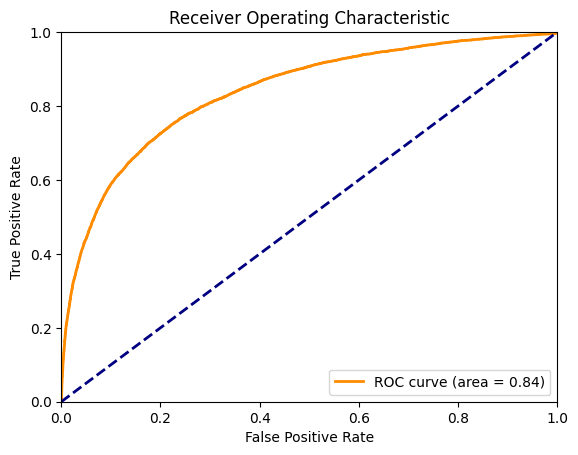

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Cross-Validation ROC-AUC: 0.8387042188791881


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# WoE va IV ni hisoblash uchun funksiyani yarataylik
def WoE(df, feature_name, target_name):
    crosstab = pd.crosstab(df[feature_name], df[target_name], normalize='columns')
    crosstab['WoE'] = np.log((crosstab[1] + 1e-6) / (crosstab[0] + 1e-6))  # nolga bo'linishdan qochish
    return crosstab

# 1. Ma'lumotlarni yuklash
df = pd.read_csv('train.csv')

# 2. Surname bo'sh qiymatlarini olib tashlash
df = df.dropna(subset=['Surname'])

# 3. Kategorik ustunlarni kodlash (Gender va Geography)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Geography ustunini One-Hot Encoding qilish
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 4. Yangi xususiyatlar yaratish (feature engineering)
df['Balance_to_Salary'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)  # nolga bo'linishdan qochish
df['Tenure_to_Age'] = df['Tenure'] / (df['Age'] + 1e-6)
df['CreditScore_to_Age'] = df['CreditScore'] / (df['Age'] + 1e-6)
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['CreditScore_IsActive'] = df['CreditScore'] * df['IsActiveMember']

# Yangi xususiyatlar qo'shish
df['Age_Squared'] = df['Age'] ** 2  # Yoshi kvadrat
df['Salary_to_Balance'] = df['EstimatedSalary'] / (df['Balance'] + 1e-6)  # Maoshni balansga nisbati
df['Tenure_Squared'] = df['Tenure'] ** 2  # Tenure kvadrati
df['CreditScore_Squared'] = df['CreditScore'] ** 2  # Kredit balli kvadrati
df['Total_Assets'] = df['Balance'] + df['EstimatedSalary']  # Umumiy aktivlar

# 5. Polynomial features yaratish
poly = PolynomialFeatures(degree=2, interaction_only=False)  # Kvadratik xususiyatlarni ham qo'shish uchun
poly_features = poly.fit_transform(df[['CreditScore', 'Age', 'Balance']])

# Polynomial featuresni dataframega qo'shish
poly_df = pd.DataFrame(poly_features, columns=[f'poly_{i}' for i in range(poly_features.shape[1])])
df = pd.concat([df, poly_df], axis=1)

# 6. Maqsadli ustun va xususiyatlarni ajratish
X = df.drop(columns=['Exited', 'Surname', 'CustomerId', 'id'])  # Maqsadli ustun va keraksiz ustunlarni olib tashlaymiz
y = df['Exited']

# 7. Ma'lumotlarni masshtablash
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Trening va test ma'lumotlarini bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 9. Logistic Regression modelini yaratish
log_reg = LogisticRegression(class_weight='balanced')

# 10. GridSearchCV bilan optimal parametrlarni topish
param_grid = {
    'C': [0.01, 0.1, 1, 10],
}

# 11. Modelni optimallashtirish
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# 12. Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# 13. Eng yaxshi model yordamida ehtimollarni olish
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]

# 14. ROC curve va AUC hisoblash
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

# 15. ROC curve ni chizish
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 16. Cross-Validation bilan modelni baholash
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='roc_auc')
print(f"Cross-Validation ROC-AUC: {np.mean(cv_scores)}")

# 17. Test ma'lumotlarini yuklash va tayyorlash
df_test = pd.read_csv('test.csv').dropna(subset=['Surname'])

# Kategorik xususiyatlarni kodlash
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test = pd.get_dummies(df_test, columns=['Geography'], drop_first=True)

# Yangi xususiyatlar yaratish (test ma'lumotlarida)
df_test['Balance_to_Salary'] = df_test['Balance'] / (df_test['EstimatedSalary'] + 1e-6)
df_test['Tenure_to_Age'] = df_test['Tenure'] / (df_test['Age'] + 1e-6)
df_test['CreditScore_to_Age'] = df_test['CreditScore'] / (df_test['Age'] + 1e-6)
df_test['Balance_NumOfProducts'] = df_test['Balance'] * df_test['NumOfProducts']
df_test['CreditScore_IsActive'] = df_test['CreditScore'] * df_test['IsActiveMember']

# Yangi xususiyatlar qo'shish
df_test['Age_Squared'] = df_test['Age'] ** 2  # Yoshi kvadrat
df_test['Salary_to_Balance'] = df_test['EstimatedSalary'] / (df_test['Balance'] + 1e-6)  # Maoshni balansga nisbati
df_test['Tenure_Squared'] = df_test['Tenure'] ** 2  # Tenure kvadrati
df_test['CreditScore_Squared'] = df_test['CreditScore'] ** 2  # Kredit balli kvadrati
df_test['Total_Assets'] = df_test['Balance'] + df_test['EstimatedSalary']  # Umumiy aktivlar

# Polynomial features test set uchun yaratish
poly_test_features = poly.transform(df_test[['CreditScore', 'Age', 'Balance']])
poly_test_df = pd.DataFrame(poly_test_features, columns=[f'poly_{i}' for i in range(poly_test_features.shape[1])])
df_test = pd.concat([df_test, poly_test_df], axis=1)

# Test ma'lumotlarini masshtablashA
X_test_scaled = scaler.transform(df_test.drop(columns=['Surname', 'CustomerId', 'id']))

# Test to'plamida ehtimollarni bashorat qilish
y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# 18. Bashoratlarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['Exited'] = y_test_prob
subm.to_csv("9_urinish.csv", index=False)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Ma'lumotlarni yuklash
df = pd.read_csv('train.csv')

# 2. Kategorik ustunlarni kodlash (Gender va Geography)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Geography ustunini One-Hot Encoding qilish
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 3. Yangi xususiyatlar yaratish (feature engineering)
df['Balance_to_Salary'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)  # nolga bo'linishdan qochish
df['Tenure_to_Age'] = df['Tenure'] / (df['Age'] + 1e-6)
df['CreditScore_to_Age'] = df['CreditScore'] / (df['Age'] + 1e-6)
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['CreditScore_IsActive'] = df['CreditScore'] * df['IsActiveMember']

# Polynomial features uchun kerakli ustunlarni tanlaymiz
poly_features_cols = ['CreditScore', 'Age', 'Balance']

# 4. Maqsadli ustun va xususiyatlarni ajratish
X = df.drop(columns=['Exited', 'Surname', 'CustomerId', 'id'])  # Maqsadli ustun va keraksiz ustunlarni olib tashlaymiz
y = df['Exited']

# 5. Pipeline yaratish
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Masshtablash
    ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),  # Polynomial xususiyatlar
    ('log_reg', LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=10000))  # Logistic regression
])

# 6. GridSearchCV bilan optimal parametrlarni topish
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],
    'log_reg__penalty': ['l2'],
    'poly__degree': [1, 2, 3]  # Polynomial darajasi bilan o'ynash
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, y)

# 7. Eng yaxshi parametrlar
best_params = grid_search.best_params_
print(f"Eng yaxshi parametrlar: {best_params}")

# 8. Eng yaxshi model yordamida ehtimollarni olish
best_model = grid_search.best_estimator_

# 9. Modelni baholash
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"Cross-Validationning o'rtacha ROC-AUC: {np.mean(cv_scores):.2f}")

# 10. ROC curve va AUC hisoblash
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
best_model.fit(X_train, y_train)
y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

# 11. ROC curve ni chizish
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 12. Test ma'lumotlarini yuklash va tayyorlash
df_test = pd.read_csv('test.csv').dropna(subset=['Surname'])

# Kategorik xususiyatlarni kodlash
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])
df_test = pd.get_dummies(df_test, columns=['Geography'], drop_first=True)

# Yangi xususiyatlar yaratish (test ma'lumotlarida)
df_test['Balance_to_Salary'] = df_test['Balance'] / (df_test['EstimatedSalary'] + 1e-6)
df_test['Tenure_to_Age'] = df_test['Tenure'] / (df_test['Age'] + 1e-6)
df_test['CreditScore_to_Age'] = df_test['CreditScore'] / (df_test['Age'] + 1e-6)
df_test['Balance_NumOfProducts'] = df_test['Balance'] * df_test['NumOfProducts']
df_test['CreditScore_IsActive'] = df_test['CreditScore'] * df_test['IsActiveMember']

# Polynomial features test set uchun yaratish
X_test = df_test.drop(columns=['Surname', 'CustomerId', 'id'])
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Bashoratlarni saqlash
subm = pd.read_csv("sample_submission.csv")
subm['Exited'] = y_test_prob
subm.to_csv("10_urinish.csv", index=False)
###git remote add origin https://github.com/AbdulboriyBaxodirovich/classification_model_loyiha.git

KeyboardInterrupt: 